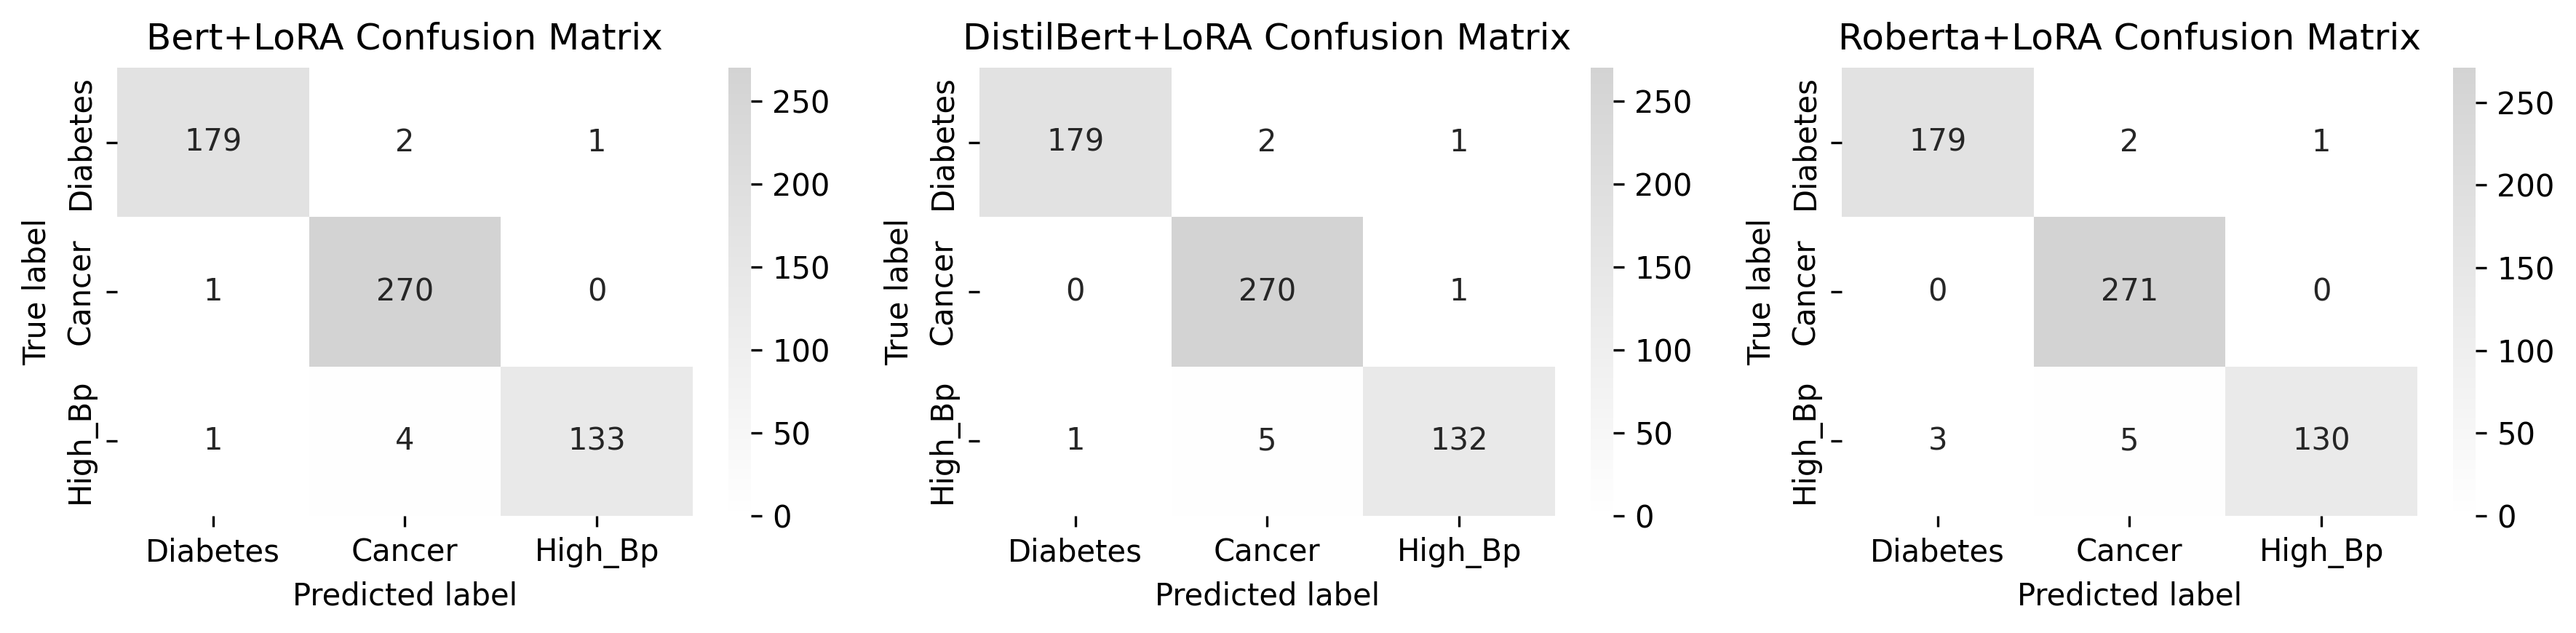

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define three different confusion matrices
confusion_matrices = [
    np.array([
        [179,2,1],
        [1, 270,0],
        [1,4,133]
    ]),
    np.array([
        [179,2,1],
        [0, 270,1],
        [1,5,132]

    ]),
    np.array([
        [179,2,1],
        [0, 271,0],
        [3,5,130]
    ]),

]

labels = ['Diabetes', 'Cancer', 'High_Bp']

cmap = mcolors.LinearSegmentedColormap.from_list("light_gray", ["white", "lightgray"])

fig, axes = plt.subplots(1, 3, figsize=(12, 3),dpi=300)

titles = ['Bert+LoRA Confusion Matrix', 'DistilBert+LoRA Confusion Matrix', 'Roberta+LoRA Confusion Matrix']

for i, (conf_matrix, ax) in enumerate(zip(confusion_matrices, axes)):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap,
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

plt.tight_layout()
plt.show()


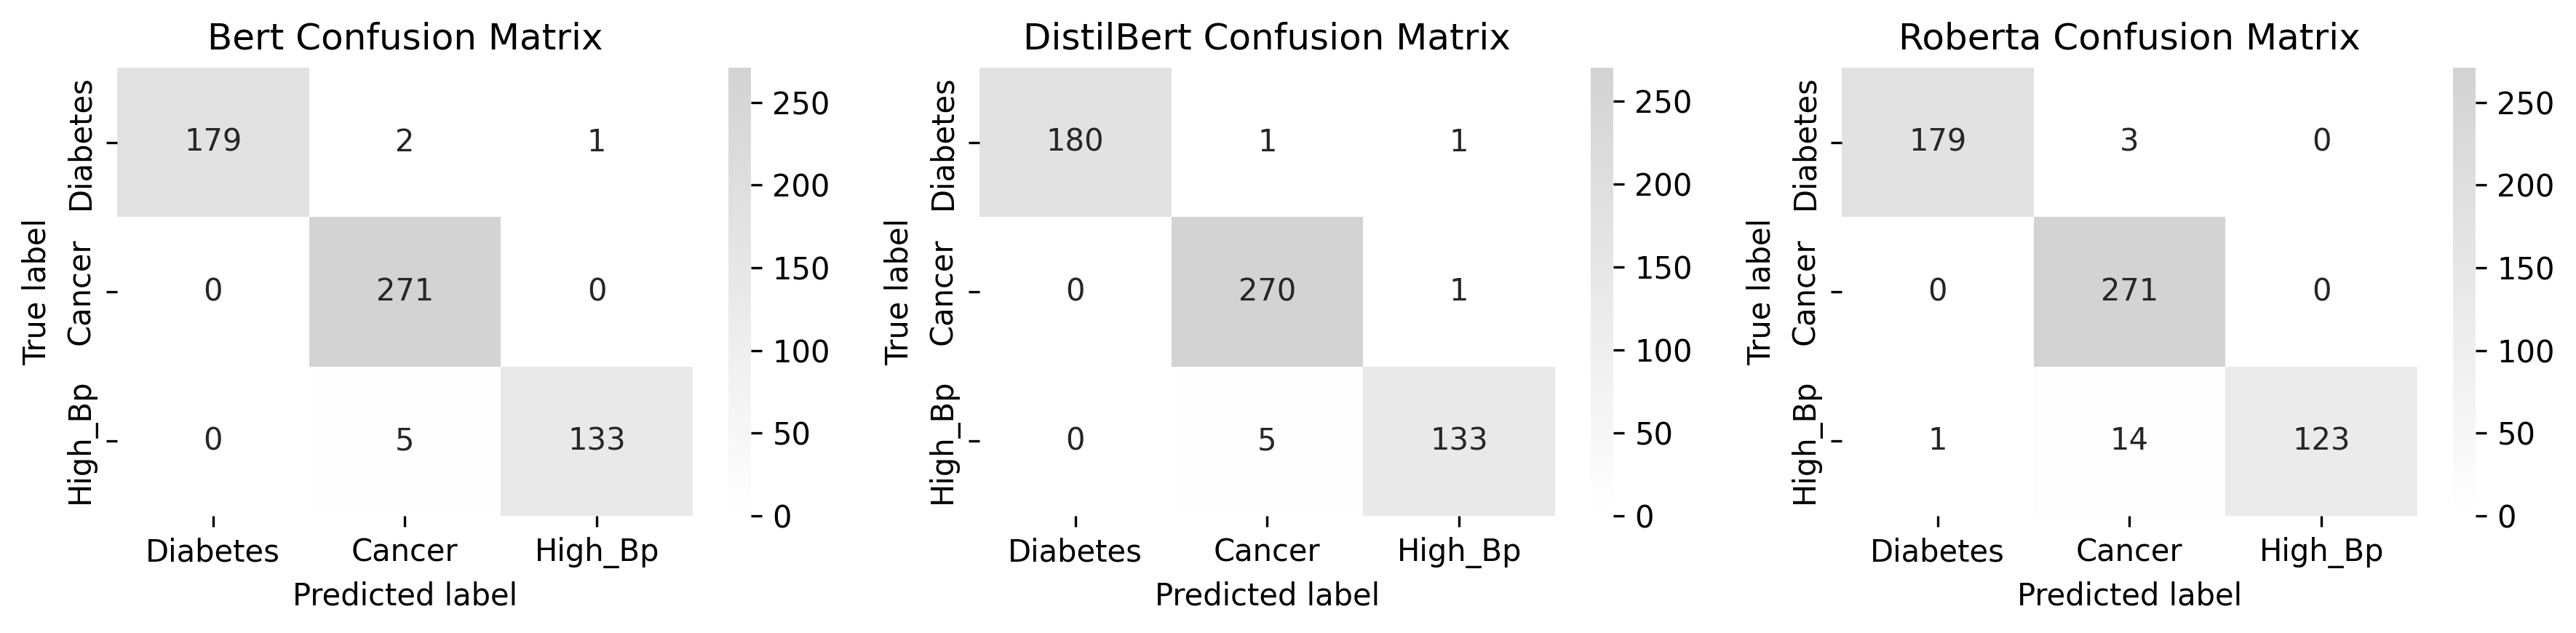

In [32]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define three different confusion matrices
confusion_matrices = [
    np.array([
        [179,2,1],
        [0, 271,0],
        [0,5,133]
    ]),
    np.array([
        [180,1,1],
        [0, 270,1],
        [0,5,133]

    ]),
    np.array([
        [179,3,0],
        [0, 271,0],
        [1,14,123]
    ]),

]

labels = ['Diabetes', 'Cancer', 'High_Bp']

cmap = mcolors.LinearSegmentedColormap.from_list("light_gray", ["white", "lightgray"])

fig, axes = plt.subplots(1, 3, figsize=(12, 3),dpi=300)

titles = ['Bert Confusion Matrix', 'DistilBert Confusion Matrix', 'Roberta Confusion Matrix']

for i, (conf_matrix, ax) in enumerate(zip(confusion_matrices, axes)):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap,
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

plt.tight_layout()
plt.show()


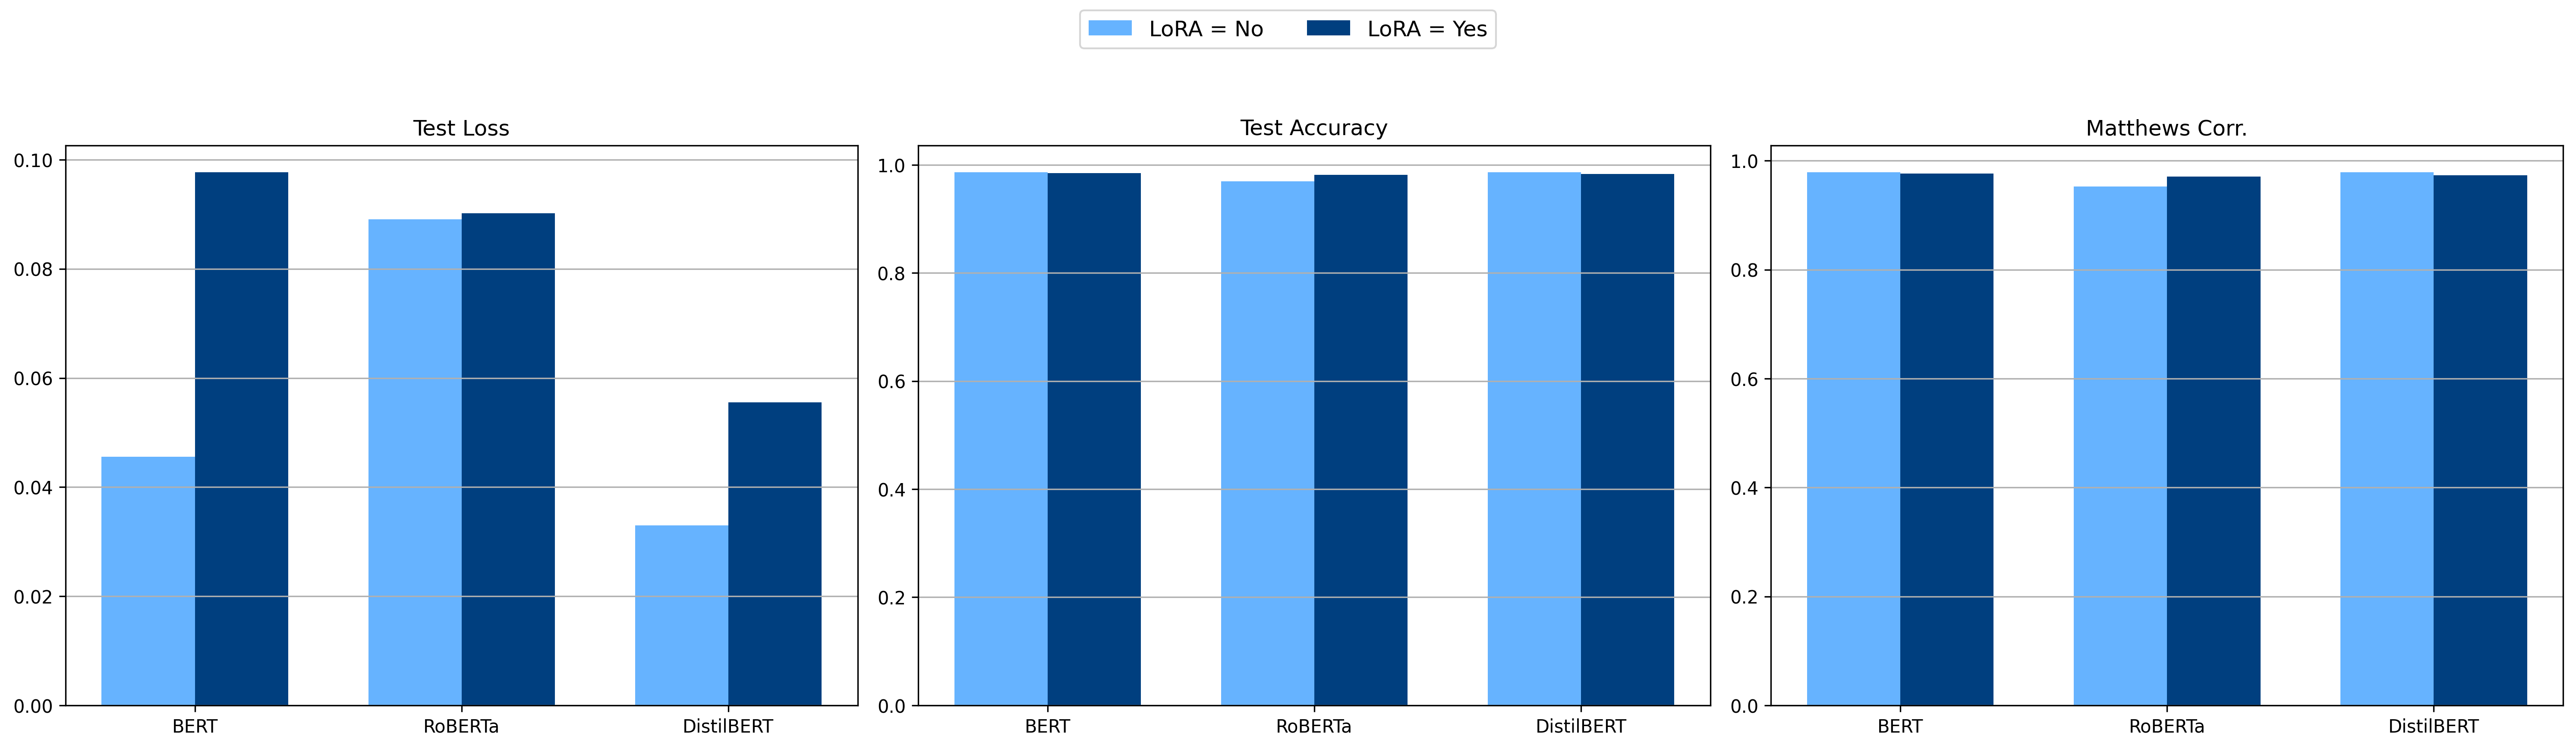

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ['BERT', 'RoBERTa', 'DistilBERT']
x = np.arange(len(models))
bar_width = 0.35

# Metrics with and without LoRA
metrics = {
    'Test Loss': {
        'No': [0.0456, 0.0891, 0.0330],
        'Yes': [0.0977, 0.0902, 0.0555]
    },
    'Test Accuracy': {
        'No': [0.9864, 0.9695, 0.9864],
        'Yes': [0.9847, 0.9813, 0.9830]
    },
    'Matthews Corr.': {
        'No': [0.9789, 0.9531, 0.9788],
        'Yes': [0.9762, 0.9710, 0.9736]
    }
    # 'Trainable Params': {
    #     'No': [108312579, 124647939, 66955779],
    #     'Yes': [297219, 1035267, 740355]
    # },
    # 'Inference Time (s)': {
    #     'No': [0.0012, 0.0012, 0.0008],
    #     'Yes': [0.0052, 0.0047, 0.0023]
    # },
    # 'GPU Allocated (MB)': {
    #     'No': [1258.57, 1446.56, 786.21],
    #     'Yes': [433.43, 504.9, 282.1]
    # },
    # 'Training Time (s)': {
    #     'No': [437.2660, 565.8939, 260.1873],
    #     'Yes': [368.5008, 607.8199, 257.6330]
    # }
}

# Plotting each metric in a grid
fig, axes = plt.subplots(3, 3, figsize=(20, 15),dpi=300)
axes = axes.flatten()

colors = ['#66b3ff', '#003f7f']  # Blue shades for No and Yes

for i, (metric_name, values) in enumerate(metrics.items()):
    ax = axes[i]
    no_lora = values['No']
    yes_lora = values['Yes']

    ax.bar(x - bar_width/2, no_lora, bar_width, label='LoRA = No', color=colors[0])
    ax.bar(x + bar_width/2, yes_lora, bar_width, label='LoRA = Yes', color=colors[1])

    ax.set_title(metric_name)
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.grid(True, axis='y')

# Add a single legend to the entire figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize='large')

# Hide unused subplot if number of metrics < total subplots
for j in range(len(metrics), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



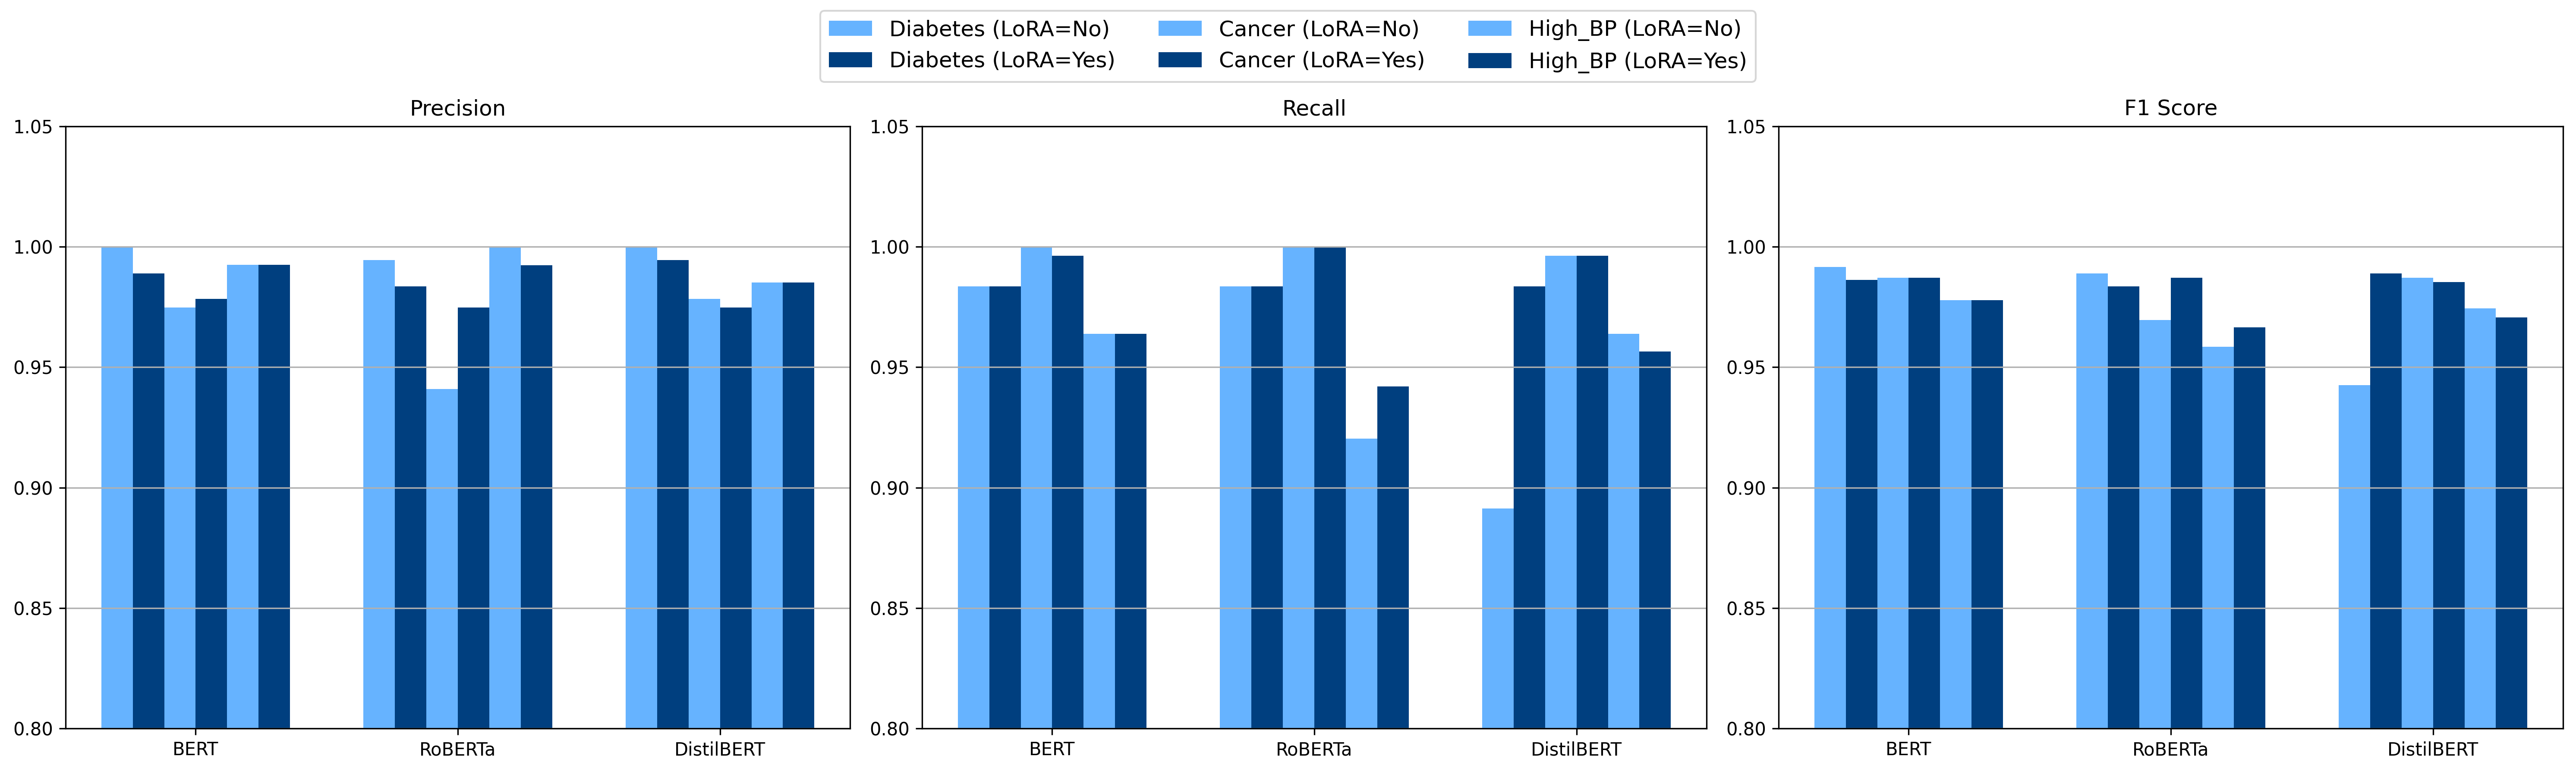

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Models and Classes
models = ['BERT', 'RoBERTa', 'DistilBERT']
classes = ['Diabetes', 'Cancer', 'High_BP']
x = np.arange(len(models))
bar_width = 0.12

# Define metrics for each model, class, and LoRA setting
# Shape: [Metric][LoRA][Model][Class]
metrics = {
    'Precision': {
        'No': np.array([[1.0000, 0.9748, 0.9925],
                        [0.9944, 0.9410, 1.0000],
                        [1.0000, 0.9783, 0.9852]]),
        'Yes': np.array([[0.9890, 0.9783, 0.9925],
                         [0.9835, 0.9748, 0.9924],
                         [0.9944, 0.9747, 0.9851]])
    },
    'Recall': {
        'No': np.array([[0.9835, 1.0000, 0.9638],
                        [0.9835, 1.0000, 0.9203],
                        [0.8913, 0.9963, 0.9638]]),
        'Yes': np.array([[0.9835, 0.9963, 0.9638],
                         [0.9835, 1.0000, 0.9420],
                         [0.9835, 0.9963, 0.9565]])
    },
    'F1 Score': {
        'No': np.array([[0.9917, 0.9872, 0.9779],
                        [0.9890, 0.9696, 0.9585],
                        [0.9425, 0.9872, 0.9744]]),
        'Yes': np.array([[0.9862, 0.9872, 0.9779],
                         [0.9835, 0.9872, 0.9665],
                         [0.9890, 0.9854, 0.9706]])
    }
}

# Plotting each metric in a grid
fig, axes = plt.subplots(1, 3, figsize=(20, 6),dpi=300)
colors = ['#66b3ff', '#003f7f']  # Blue shades for LoRA No and Yes

for i, (metric_name, values) in enumerate(metrics.items()):
    ax = axes[i]
    for class_idx, cls in enumerate(classes):
        offset = (class_idx - 1) * 2 * bar_width
        for lora_idx, lora in enumerate(['No', 'Yes']):
            class_values = values[lora][:, class_idx]
            ax.bar(x + offset + (lora_idx - 0.5) * bar_width,
                   class_values,
                   width=bar_width,
                   color=colors[lora_idx],
                   label=f'{cls} (LoRA={lora})' if i == 0 else "")

    ax.set_title(metric_name)
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.set_ylim(0.8, 1.05)
    ax.grid(True, axis='y')

# Add a single legend to the entire figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, fontsize='large')

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()



'Untitled1.png'

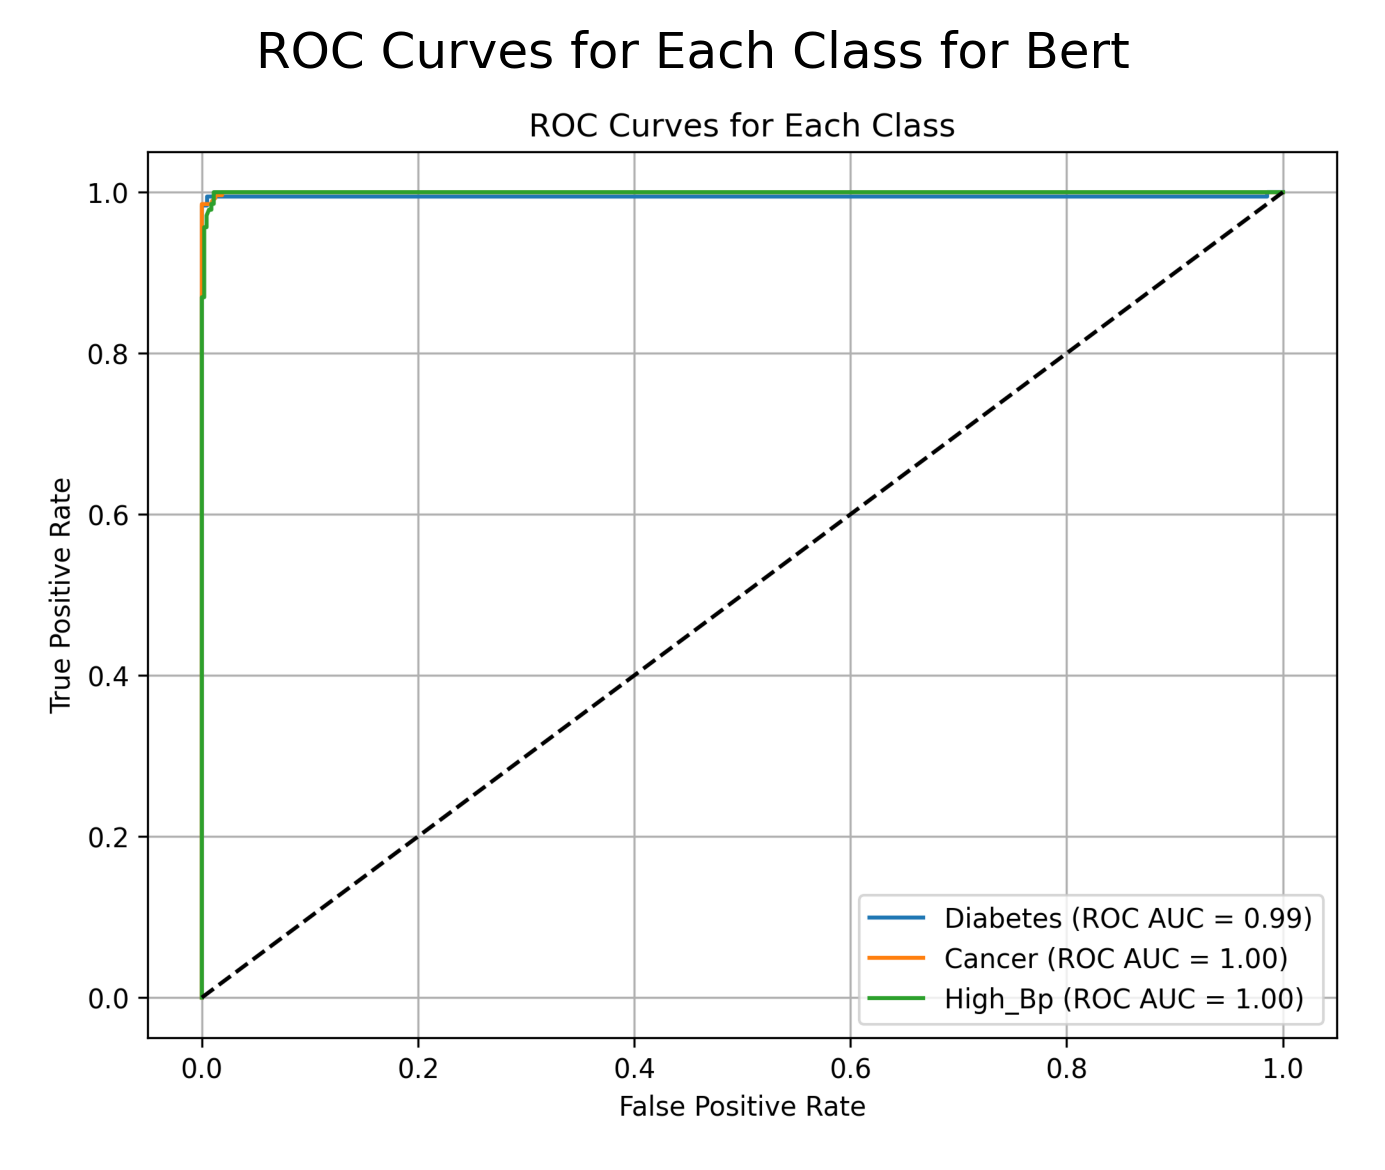

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the original image
image_path = "Untitled.png"
original_image = Image.open(image_path)

# Plot the image with the updated title
plt.figure(figsize=(6, 4), dpi=300)
plt.imshow(original_image)
plt.axis('off')
plt.title("ROC Curves for Each Class for Bert")
plt.tight_layout()
output_path = "Untitled1.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
output_path


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import pandas as pd

In [17]:
df = pd.read_csv ('/content/drive/MyDrive/XAI_ADR/FinalADR.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df=df.dropna()
df.head()

,text,searchTerm,disease,processed_text
0,Buy top levothyroxine online on our free compa...,Levothyroxine,Cancer,"['buy', 'top', 'free', 'comparison', 'site', '..."
1,@femmebostonian @Cherrell_Brown This has been ...,Levothyroxine,Cancer,"['super', 'help', 'switch', 'due', 'cost', 'ne..."
2,For a decade I was on Levothyroxine 137 mcg. I...,Levothyroxine,Cancer,"['decad', 'see', 'even', 'bit', 'bad', 'heart'..."
3,@yourAAH Hi could you tell me which of your UK...,Levothyroxine,Cancer,"['hi', 'could', 'tell', 'stock']"
4,And my levothyroxine,Levothyroxine,Cancer,[]


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3937 entries, 0 to 3944
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            3937 non-null   object
 1   searchTerm      3937 non-null   object
 2   disease         3937 non-null   object
 3   processed_text  3937 non-null   object
dtypes: object(4)
memory usage: 153.8+ KB


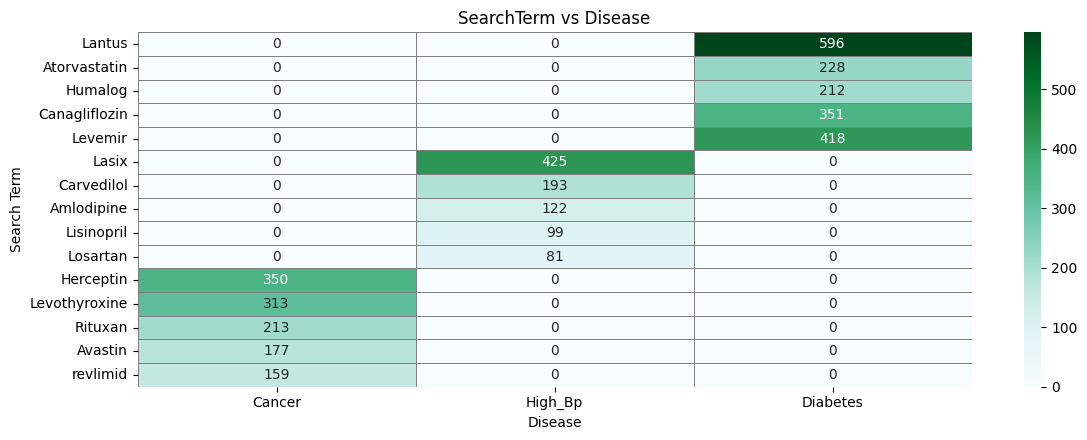

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list

# Your crosstab
ct = pd.crosstab(df['searchTerm'], df['disease'])

# Reorder columns to your specific order
disease_order = ['Cancer', 'High_Bp', 'Diabetes']
for d in disease_order:
    if d not in ct.columns:
        ct[d] = 0
ct = ct[disease_order]

# Convert to matrix for clustering
row_linkage = linkage(ct.values, method='average')
row_order = leaves_list(row_linkage)

# Reorder rows to group similar ones (zeros together visually)
ct_clustered = ct.iloc[row_order]

# Plot
plt.figure(figsize=(12, max(4, 0.3*len(ct_clustered))))
sns.heatmap(ct_clustered, annot=True, fmt='d', cmap='BuGn', cbar=True, linewidths=0.5, linecolor='gray')
plt.title("SearchTerm vs Disease")
plt.ylabel("Search Term")
plt.xlabel("Disease")
plt.tight_layout()
plt.show()


/tmp/ipython-input-31-2522079259.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=searchterm_counts.index, y=searchterm_counts.values, palette='viridis')
/tmp/ipython-input-31-2522079259.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=disease_counts.index, y=disease_counts.values, palette='Blues')


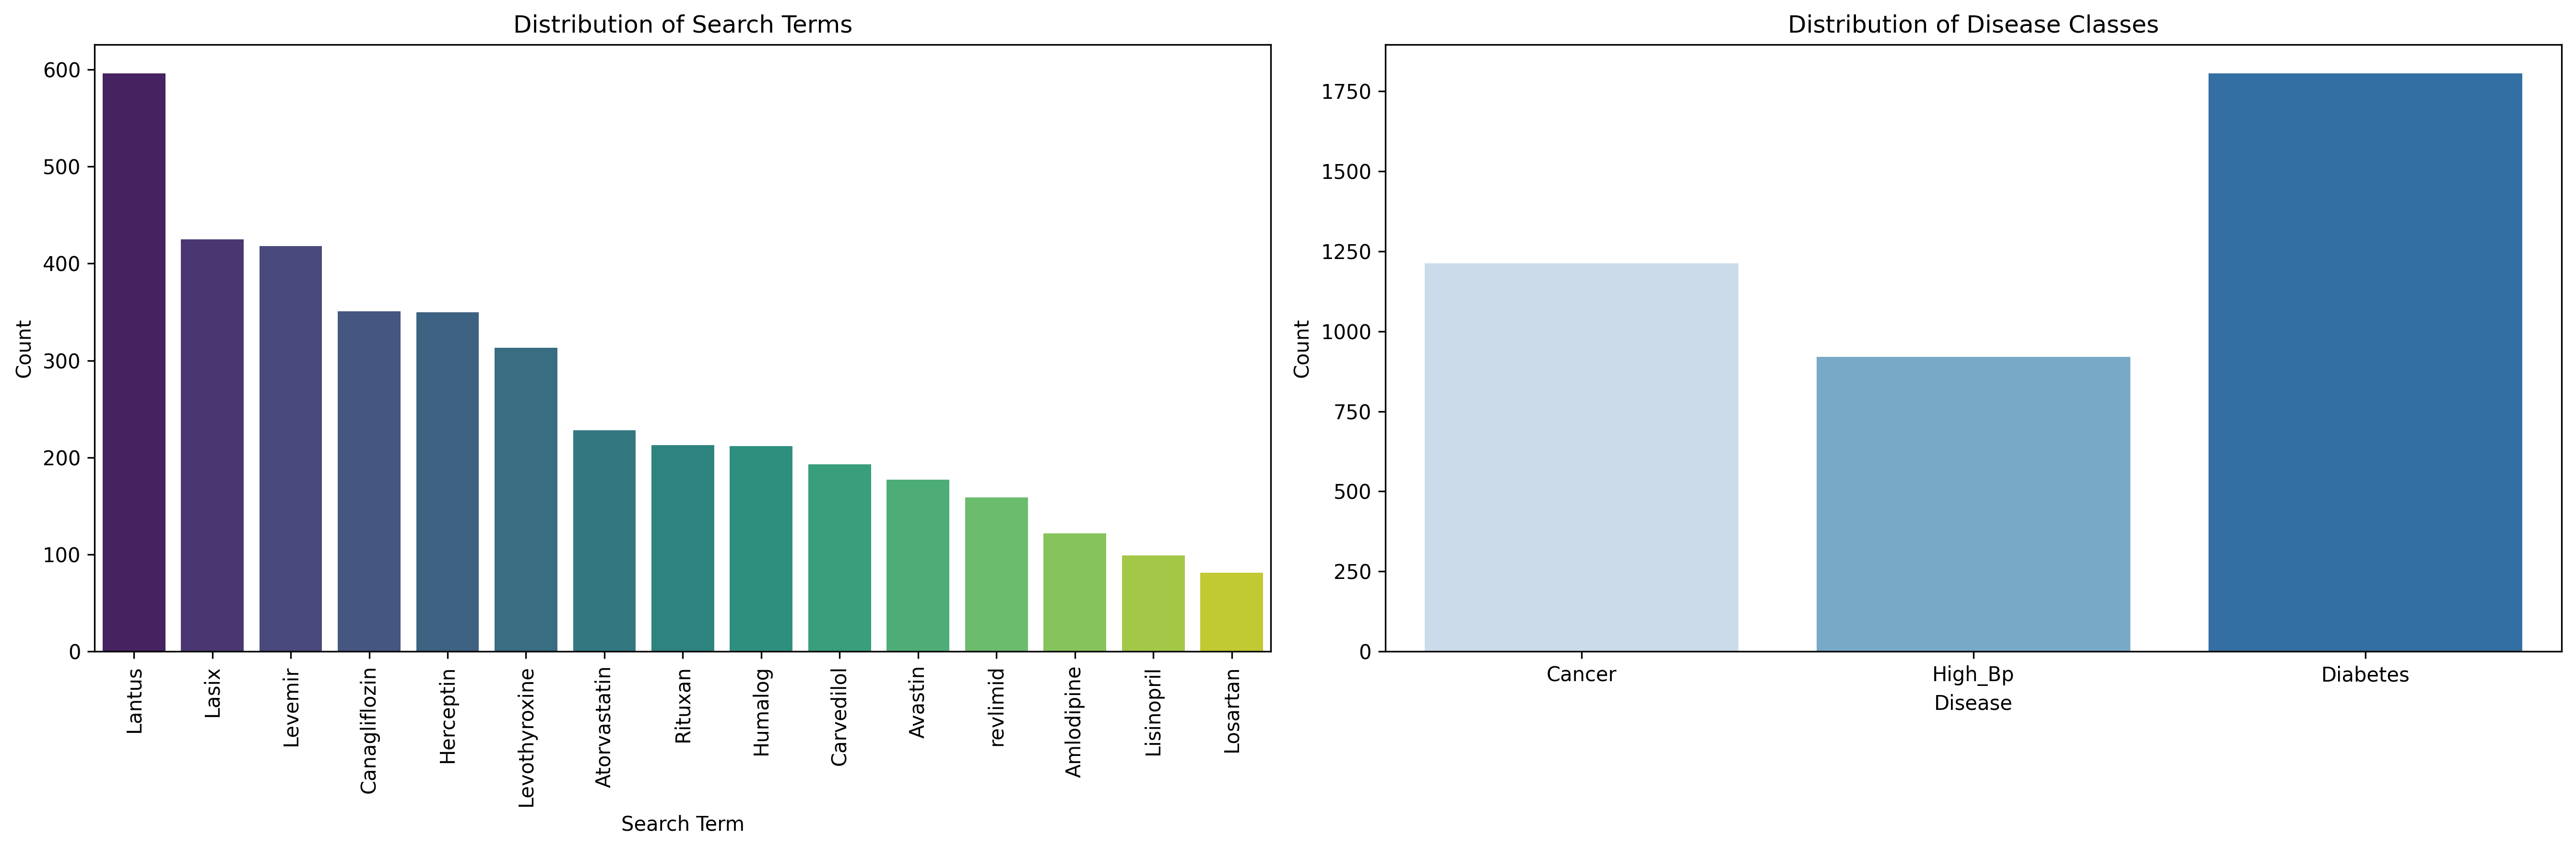

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count values
searchterm_counts = df['searchTerm'].value_counts()
disease_order = ['Cancer', 'High_Bp', 'Diabetes']
disease_counts = df['disease'].value_counts().reindex(disease_order)

fig, axes = plt.subplots(1, 2, figsize=(18, 6), dpi=300)

sns.barplot(ax=axes[0], x=searchterm_counts.index, y=searchterm_counts.values, palette='viridis')
axes[0].set_title('Distribution of Search Terms')
axes[0].set_xlabel('Search Term')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(ax=axes[1], x=disease_counts.index, y=disease_counts.values, palette='Blues')
axes[1].set_title('Distribution of Disease Classes')
axes[1].set_xlabel('Disease')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()
